# This ipynb is used for model construction and evaluation

In [31]:
import pandas as pd
from pandas_summary import DataFrameSummary
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
import timeit
from sklearn.utils import shuffle
#preprocessed data from select.ipynb
bid = pd.read_csv("selectResult.csv")
bid.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,outcome
0,20,365,55.188367,0.2,0.475238,0.002292,57,19.645109,86.979313,1
1,36,183,3.040317,0.9,0.825413,0.003438,147,61.384112,30.403445,1
2,47,158,14.111038,0.9,1.100550,0.005730,62,97.832642,12.200069,1
3,55,368,34.434898,0.5,0.100050,0.006877,151,47.497305,86.979313,1
4,107,447,43.258427,0.7,2.026013,0.012607,146,96.730688,11.479297,1


# Linear classifier for model construction
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [32]:
bid = pd.read_csv("selectResult.csv")
feature_cols = ['bid_id', 'bidder_id', 'auction', 'merchandise','device','time','country','ip', 'url']
#need to shuffle every time building the model, or the evaluation would be higher and higher
bid = shuffle(bid)
X = bid[feature_cols] 
y = bid['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [33]:
start1 = timeit.default_timer()
clf_SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

clf_SGD = clf_SGD.fit(X_train,y_train)
y_pred_SGD = clf_SGD.predict(X_test)
stop1 = timeit.default_timer()

print('Running Time: ', stop1 - start1)  

Running Time:  0.15530876699631335


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [34]:
# "weight" means calculating metrics for each label, and find their average weighted by support 
#(the number of true instances for each label)
print("Accuracy of linear classifier:",metrics.accuracy_score(y_test, y_pred_SGD))
print("Accuracy of linear classifier:",metrics.accuracy_score(y_test, y_pred_SGD))
print("Recall of linear classifier:",recall_score(y_test, y_pred_SGD, average='weighted'))
print("Precision of linear classifier:",precision_score(y_test, y_pred_SGD, average='weighted'))
print("F1 scores of linear classifier:",f1_score(y_test, y_pred_SGD, average='weighted'))
print('\n==================\nConfusionn matrix')
print(confusion_matrix(y_test, y_pred_SGD),'\n==================')

Accuracy of linear classifier: 0.46237406920718355
Accuracy of linear classifier: 0.46237406920718355
Recall of linear classifier: 0.46237406920718355
Precision of linear classifier: 0.7070100634300891
F1 scores of linear classifier: 0.3442806794662886

Confusionn matrix
[[ 1713 18223]
 [  188 14121]] 


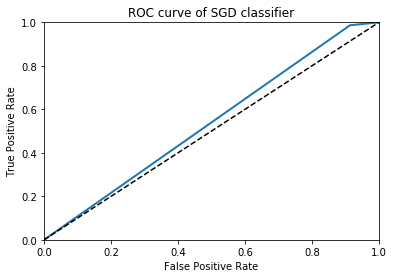

AUC:  0.5363931878818425


In [35]:
fpr_SGD, tpr_SGD, thresholds_SGD = roc_curve(y_test, y_pred_SGD)
fig = plt.figure()
plt.plot(fpr_SGD, tpr_SGD, linewidth=2,label = 'SGD')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.title('ROC curve of SGD classifier')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
#plt.savefig('img/SGDROC.png')
fig.savefig('img/SGDROC.png')
auc_SGD = auc(fpr_SGD, tpr_SGD)
print('AUC: ', auc_SGD)

In [36]:
#print (clf.coef_)
#print (clf_SGD.intercept_)
print('Coefficient for each features:\n',clf_SGD.coef_)


#coeff_df = pd.DataFrame( coef, X_train.columns ,columns=['Coefficient'])  
#coeff_df

Coefficient for each features:
 [[  13823.41191569 -681890.02132281 -104362.1240163    -1578.82121474
    -8661.56186399   18161.56362621 -182376.59607409 -110377.08478231
  -152508.99232454]]


# DecisionTree model construction

In [37]:
bid = pd.read_csv("selectResult.csv")
X = bid[feature_cols] 
y = bid['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
start2 = timeit.default_timer()
clf_decisionTree = DecisionTreeClassifier()
clf_decisionTree = clf_decisionTree.fit(X_train,y_train)
y_pred_decisionTree = clf_decisionTree.predict(X_test)
stop2 = timeit.default_timer()
print("Accuracy of decision tree algorithem:",metrics.accuracy_score(y_test, y_pred_decisionTree))
print("Recall of decision tree algorithem:",recall_score(y_test, y_pred_decisionTree, average='weighted'))
print("Precision of decision tree algorithem:",precision_score(y_test, y_pred_decisionTree, average='weighted'))

print('\n==================\nConfusionn matrix')
print(confusion_matrix(y_test, y_pred_decisionTree),'\n==================')

print('Running Time: ', stop2 - start2)  

Accuracy of decision tree algorithem: 0.9997371879106439
Recall of decision tree algorithem: 0.9997371879106439
Precision of decision tree algorithem: 0.9997372110476057

Confusionn matrix
[[19804     6]
 [    3 14432]] 
Running Time:  0.35308271900430555


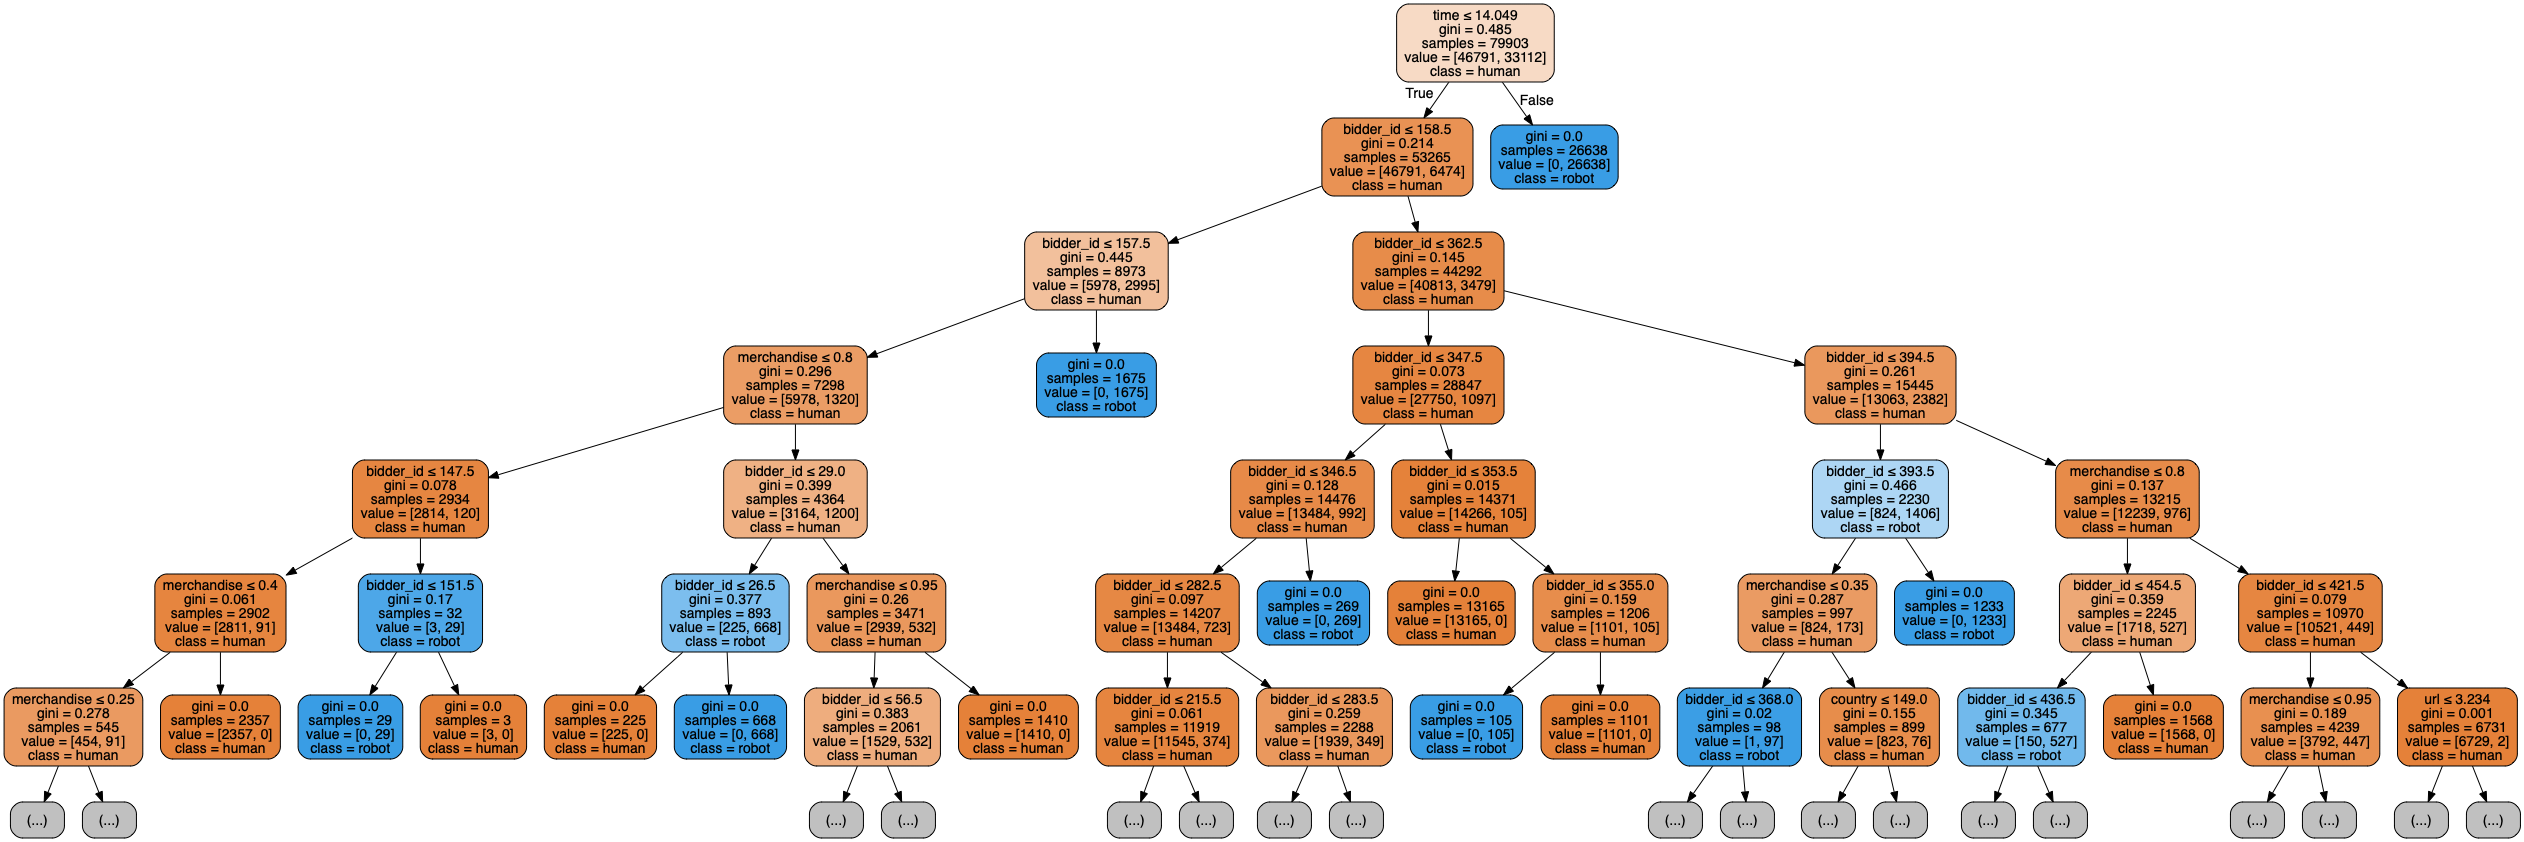

In [38]:
#draw the decision tree with depth = 6
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf_decisionTree, out_file=dot_data,
                filled=True, rounded=True,
                feature_names=X_train.columns.values,
                class_names=['human', 'robot'],max_depth = 6,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('img/decisionTree.png')
Image(graph.create_png())

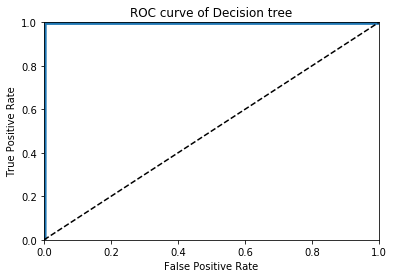

AUC:  0.9997446472349809


In [39]:
fpr_decisionTree, tpr_decisionTree, thresholds = roc_curve(y_test, y_pred_decisionTree)
fig = plt.figure()
plt.plot(fpr_decisionTree, tpr_decisionTree, linewidth=5, label='decision tree')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.title('ROC curve of Decision tree')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_decisionTree = auc(fpr_decisionTree, tpr_decisionTree)
print('AUC: ', auc_decisionTree)
fig.savefig('img/decisionTreeROC.png')


# KNN model construction

Running Time:  29.7454099280003


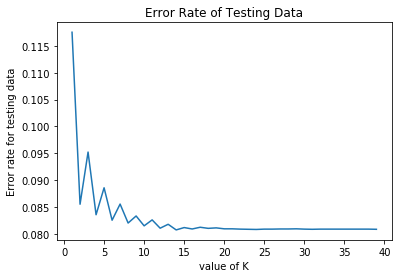

In [40]:
#feature_cols = ['bid_id', 'bidder_id', 'auction', 'merchandise','device','time','country','ip', 'url']
#X = bid[feature_cols] 
#y = bid['outcome'] 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html
bid = pd.read_csv("selectResult.csv")
X = bid[feature_cols] 
y = bid['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
start = timeit.default_timer()
k_range = range(1,40)
scores = {}
error_rate = []
for k in k_range:
    clf_knn = KNeighborsClassifier(n_neighbors = k)
    clf_knn.fit(X_train,y_train)
    y_pred_knn = clf_knn.predict(X_test)
    error_rate .append(1-metrics.accuracy_score(y_test,y_pred_knn))
#print(scores_list)
stop = timeit.default_timer()
fig = plt.figure()
plt.title('Error Rate of Testing Data')  
plt.xlabel('value of K')
plt.ylabel('Error rate for testing data')
plt.plot(k_range,error_rate)
fig.savefig('img/KNNErrorrate.png')
print('Running Time: ', stop - start)  

## Choose k = 15
 
 https://pythonspot.com/k-nearest-neighbors/

In [41]:
start3 = timeit.default_timer()
clf_knn = KNeighborsClassifier(6,weights='distance')
clf_knn = clf_knn.fit(X_train,y_train)
y_pred_knn = clf_knn.predict(X_test)
stop3 = timeit.default_timer()
print("Accuracy of KNN:",metrics.accuracy_score(y_test, y_pred_knn))
print("Recall of KNN:",recall_score(y_test, y_pred_knn, average='weighted'))
print("Precision of KNN:",precision_score(y_test, y_pred_knn, average='weighted'))

print('\n==================\nConfusionn matrix')
print(confusion_matrix(y_test, y_pred_knn),'\n==================')
#print(classification_report(y_test, y_pred_knn))
print('Running Time: ', stop3 - start3)  

Accuracy of KNN: 0.9128339903635567
Recall of KNN: 0.9128339903635567
Precision of KNN: 0.9176307881986377

Confusionn matrix
[[19357   453]
 [ 2532 11903]] 
Running Time:  0.6894226470030844


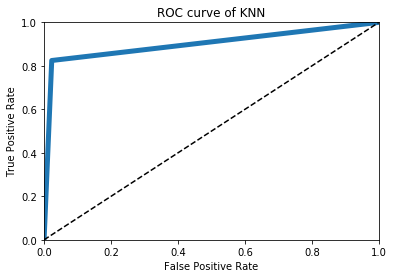

AUC:  0.900862882174562


In [42]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
fig = plt.figure()
plt.plot(fpr_knn, tpr_knn, linewidth=5, label=None)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.title('ROC curve of KNN')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
fig.savefig('img/knnROC.png')
auc_knn = auc(fpr_knn, tpr_knn)
print('AUC: ', auc_knn)


# Ensemble using random forest
https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

https://scikit-learn.org/stable/modules/ensemble.html#random-forests

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [15]:
bid = pd.read_csv("selectResult.csv")
X = bid[feature_cols] 
y = bid['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
start4 = timeit.default_timer()
clf_randomForest = RandomForestClassifier(n_estimators=100)
clf_randomForest = clf_randomForest.fit(X_train,y_train)
y_pred_randomForest = clf_randomForest.predict(X_test)
stop4 = timeit.default_timer()
print("Accuracy of randomForest:",metrics.accuracy_score(y_test, y_pred_randomForest))
print("Recall of randomForest:",recall_score(y_test, y_pred_randomForest, average='weighted'))
print("Precision of randomForest:",precision_score(y_test, y_pred_randomForest, average='weighted'))

print('\n==================\nConfusionn matrix')
print(confusion_matrix(y_test, y_pred_randomForest),'\n==================')
print('Running Time: ', stop4 - start4)  

Accuracy of randomForest: 0.9976054898525332
Recall of randomForest: 0.9976054898525332
Precision of randomForest: 0.9976120144127584

Confusionn matrix
[[19803     7]
 [   75 14360]] 
Running Time:  12.756875815000058


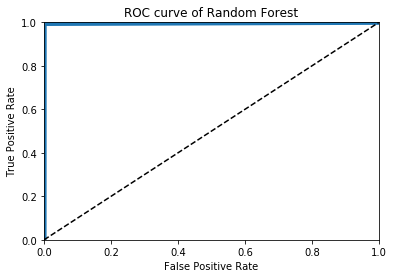

AUC:  0.9972254691127891


In [16]:
y_dt_score = clf_randomForest.predict_proba(X_test)[:, 1]

fpr_randomForest, tpr_randomForest, thresholds = roc_curve(y_test, y_pred_randomForest)
fig = plt.figure()
plt.plot(fpr_randomForest, tpr_randomForest, linewidth=5, label=None)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.title('ROC curve of Random Forest')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
fig.savefig('img/randomForestROC.png')
auc_randomForest = auc(fpr_randomForest, tpr_randomForest)
print('AUC: ', auc_randomForest)


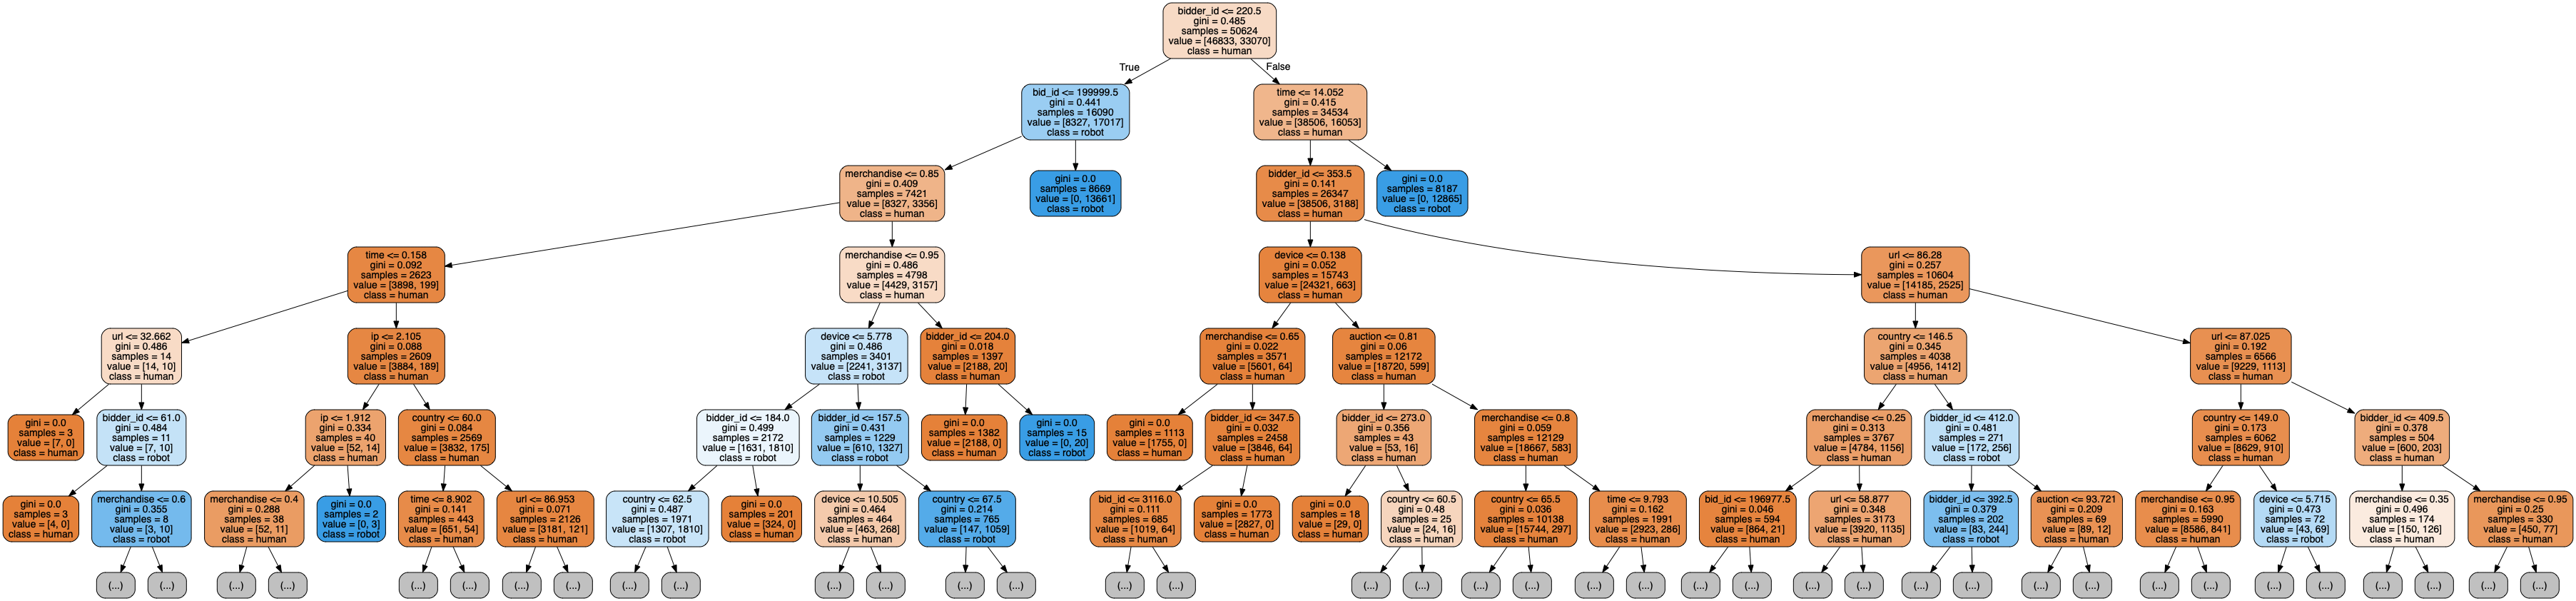

In [17]:
dot_data = StringIO()
estimator = clf_randomForest.estimators_[5]
export_graphviz(estimator, out_file=dot_data, 
                feature_names=X_train.columns.values,
                class_names=['human', 'robot'],max_depth = 6,
                rounded = True,filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('img/randomForest.png')
Image(graph.create_png())


# Rule based algorithm

In [18]:
from sklearn.datasets import load_boston
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
from skrules import SkopeRules
bid = pd.read_csv("selectResult.csv")
feature_cols = ['bid_id', 'bidder_id', 'auction', 'merchandise','device','time','country','ip', 'url']
X = bid[feature_cols] 
y = bid['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [19]:
 
start6 = timeit.default_timer()
clf_RB = SkopeRules(n_estimators=100,precision_min=0.3,
                 recall_min=0.1,
                 feature_names=X_train.columns.values)
clf_RB = clf_RB.fit(X_train,y_train)
y_pred_RB = clf_RB.predict(X_test)
stop6 = timeit.default_timer()


print("Accuracy of randomForest:",metrics.accuracy_score(y_test, y_pred_RB))
print("Recall of randomForest:",recall_score(y_test, y_pred_RB, average='weighted'))
print("Precision of randomForest:",precision_score(y_test, y_pred_RB, average='weighted'))

print('\n==================\nConfusionn matrix')
print(confusion_matrix(y_test, y_pred_RB),'\n==================')
print('Running Time: ', stop6 - start6)  

Accuracy of randomForest: 0.9192290845378888
Recall of randomForest: 0.9192290845378888
Precision of randomForest: 0.9291250958848146

Confusionn matrix
[[19810     0]
 [ 2766 11669]] 
Running Time:  41.83117909999987


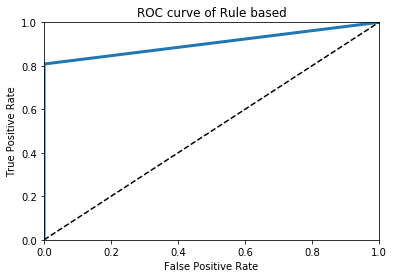

AUC:  0.9041912019397298


In [20]:
fpr_rb, tpr_rb, thresholds = roc_curve(y_test, y_pred_RB)
fig = plt.figure()
plt.plot(fpr_rb, tpr_rb, linewidth=3, label=None)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.title('ROC curve of Rule based')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
fig.savefig('img/ruleBased.png')
auc_rb = auc(fpr_rb, tpr_rb)
print('AUC: ', auc_rb)


#  Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

bid = pd.read_csv("selectResult.csv")
X = bid[feature_cols] 
y = bid['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
start5 = timeit.default_timer()
clf_NB = GaussianNB()
clf_NB = clf_NB.fit(X_train,y_train)
y_pred_NB = clf_NB.predict(X_test)
stop5 = timeit.default_timer()


print("Accuracy of Naive Bayes:",metrics.accuracy_score(y_test, y_pred_NB))
print("Recall of Naive Bayes:",recall_score(y_test, y_pred_NB, average='weighted'))
print("Precision of Naive Bayes:",precision_score(y_test, y_pred_NB, average='weighted'))

print('\n==================\nConfusionn matrix')
print(confusion_matrix(y_test, y_pred_NB),'\n==================')
print('Running Time: ', stop5 - start5) 

Accuracy of Naive Bayes: 0.8989633523142064
Recall of Naive Bayes: 0.8989633523142064
Precision of Naive Bayes: 0.9112555629341763

Confusionn matrix
[[19672   138]
 [ 3322 11113]] 
Running Time:  0.045548568000185696


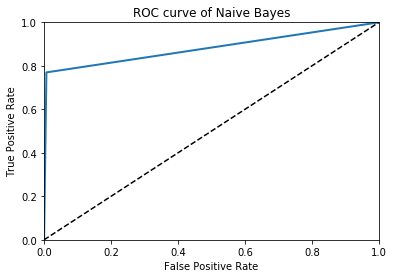

AUC:  0.8814493664876947


In [22]:
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, y_pred_NB)
fig = plt.figure()
plt.plot(fpr_NB, tpr_NB, linewidth=2, label=None)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.title('ROC curve of Naive Bayes')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
fig.savefig('img/naiveBayesROC.png')
auc_NB = auc(fpr_NB, tpr_NB)
print('AUC: ', auc_NB)

# ROC curve comparision of existing models

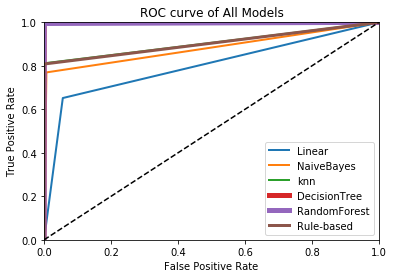

In [24]:

fig = plt.figure()
plt.plot(fpr_SGD, tpr_SGD, linewidth=2,label = 'Linear')
plt.plot(fpr_NB, tpr_NB, linewidth=2, label='NaiveBayes')
plt.plot(fpr_knn, tpr_knn, linewidth=2, label='knn')
plt.plot(fpr_decisionTree, tpr_decisionTree, linewidth=5, label='DecisionTree')
plt.plot(fpr_randomForest, tpr_randomForest, linewidth=5, label='RandomForest')
plt.plot(fpr_rb, tpr_rb, linewidth=3, label='Rule-based')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.title('ROC curve of All Models')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
fig.savefig('img/combineROC.png')
